# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

### Import Modules

In [1]:
from sklearn.utils import shuffle
import pickle
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
import os
import PIL
from PIL import Image
import random
import tensorflow as tf
from tensorflow.contrib.layers import flatten
import numpy as np
import cv2
import skimage.transform
# Visualizations will be shown in the notebook.
%matplotlib inline

### Load the data

In [2]:
# TODO: Fill this in based on where you saved the training and testing data.

training_file = "/home/carnd/CarND-Traffic-Sign-Classifier-Project/traffic-signs-data/train.p"
validation_file= "/home/carnd/CarND-Traffic-Sign-Classifier-Project/traffic-signs-data/valid.p"
testing_file = "/home/carnd/CarND-Traffic-Sign-Classifier-Project/traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
# TODO: Number of training examples.
if X_train.shape[0] == y_train.shape[0]:
    n_train = X_train.shape[0]
    print('Number of training features is equal to number of training labels. -> Good!')
else:
    print("Number of features is NOT equal to number of labels in the training set. -> Error!!!")

# TODO: Number of validation examples.
if X_valid.shape[0] == y_valid.shape[0]:
    n_validation = X_valid.shape[0]
    print('Number of validation features is equal to number of validation labels. -> Good!')
else:
    print("Number of features is NOT equal to number of labels in the validation set. -> Error!!!")

# TODO: Number of testing examples.
if X_test.shape[0] == y_test.shape[0]:
    n_test = X_test.shape[0]
    print('Number of test features is equal to number of test labels. -> Good!')
else:
    print("Number of features is NOT equal to number of labels in the test set. -> Error!!!")

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:4]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

# Print information.
print()
print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training features is equal to number of training labels. -> Good!
Number of validation features is equal to number of validation labels. -> Good!
Number of test features is equal to number of test labels. -> Good!

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

#### Visualization

1


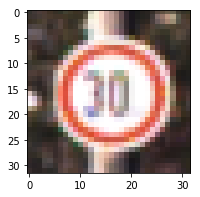

In [6]:
# Plot randomly chosen traffic sign from training data with its class id.
index = random.randint(0, n_train)
image = X_train[index].squeeze()

plt.figure(figsize=(3,3))
plt.imshow(image)
print(y_train[index])

#### Traffic sign distribution

(array([  180.,  1980.,  2010.,  1260.,  1770.,  1650.,   360.,  1290.,
         1260.,  1320.,  1800.,  1170.,  1890.,  1920.,   690.,   540.,
          360.,   990.,  1080.,   180.,   300.,   270.,   330.,   450.,
          240.,  1350.,   540.,   210.,   480.,   240.,   390.,   690.,
          210.,   599.,   360.,  1080.,   330.,   180.,  1860.,   270.,
          300.,   210.,   210.]),
 array([  0.        ,   0.97674419,   1.95348837,   2.93023256,
          3.90697674,   4.88372093,   5.86046512,   6.8372093 ,
          7.81395349,   8.79069767,   9.76744186,  10.74418605,
         11.72093023,  12.69767442,  13.6744186 ,  14.65116279,
         15.62790698,  16.60465116,  17.58139535,  18.55813953,
         19.53488372,  20.51162791,  21.48837209,  22.46511628,
         23.44186047,  24.41860465,  25.39534884,  26.37209302,
         27.34883721,  28.3255814 ,  29.30232558,  30.27906977,
         31.25581395,  32.23255814,  33.20930233,  34.18604651,
         35.1627907 ,  36.1395

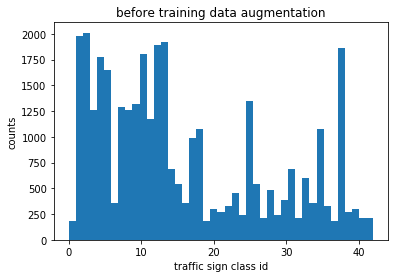

In [7]:
# Plot histogram of traffic sign type distribution in original training data.
plt.title('before training data augmentation')
plt.xlabel('traffic sign class id')
plt.ylabel('counts')
plt.hist(y_train, bins = 43)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Training data augmentation

In [8]:
#%%time

# Define image rotation around center of image.
def rotate(image, angle):
    return skimage.transform.rotate(image, angle, resize = False, center = None, mode = 'edge')
     
# Define image resize.
def resize(image):
    resized_image = cv2.resize(image, dsize = (28, 28))
    return np.pad(resized_image, ((2,2),(2,2),(0,0)), 'edge')

# Define append function.
def add(X_data, y_data, x, y):
    return X_data.append(x), y_data.append(y)

# Define data augmentation (threshoold1, threshold2).
def augment(X_data, y_data, n_classes, threshold1, threshold2):
    X_train_aug = []
    y_train_aug = []
    
    low_numbers = set([low for low in range(n_classes) if np.bincount(y_data)[low] < threshold1])
    medium_numbers = set([medium for medium in range(n_classes) if np.bincount(y_data)[medium] < threshold2 and np.bincount(y_data)[medium] > threshold1])
    
    for x, y in zip(X_data, y_data):
        
        add(X_train_aug, y_train_aug, x, y)
        
        if y in low_numbers:
            rotated_image = rotate(x, 10)
            add(X_train_aug, y_train_aug, rotated_image, y)
            
            resized_image = resize(x)
            add(X_train_aug, y_train_aug, resized_image, y)
            
            rotated_image = rotate(x, -10)
            add(X_train_aug, y_train_aug, resize(rotated_image), y)
            
        elif y in medium_numbers:
            resized_image = resize(x)
            add(X_train_aug, y_train_aug, resized_image, y)

        else:
            pass
        
    return np.array(X_train_aug, np.uint8), np.array(y_train_aug, np.uint8)

# Augment training traffic signs that are underrepresented (thresholds).
X_train_aug, y_train_aug = augment(X_train, y_train, n_classes, 500, 1000)
print('Training data augmented. -> Done!')

if X_train_aug.shape[0] == y_train_aug.shape[0]:
    n_train_aug = X_train_aug.shape[0]
    print("Number of features is equal to number of labels in the augmented training set. -> Good!")
else:
    print("Number of features is NOT equal to number of labels in the augmented training set. -> Error!!!")

image_shape_aug = X_train_aug.shape[1:4]

n_classes_aug = len(set(y_train_aug))

print()
print("Number of training examples after augmentation =", n_train_aug)
print("Image data shape after augmentation =", image_shape_aug)
print("Number of classes after augmentation =", n_classes_aug)

Training data augmented. -> Done!
Number of features is equal to number of labels in the augmented training set. -> Good!

Number of training examples after augmentation = 57028
Image data shape after augmentation = (32, 32, 3)
Number of classes after augmentation = 43


#### Visualization

25


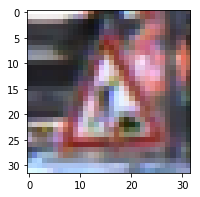

In [19]:
# Plot randomly chosen traffic sign from added training data by augmentation together with its class id.
index_aug = random.randint(n_train, n_train_aug)
image_aug = X_train_aug[index_aug].squeeze()

plt.figure(figsize=(3,3))
plt.imshow(image_aug)
print(y_train_aug[index_aug])

#### Traffic sign distribution after training data augmentation

(array([  720.,  1980.,  2010.,  1260.,  1770.,  1650.,  1440.,  1290.,
         1260.,  1320.,  1800.,  1170.,  1890.,  1920.,  1380.,  1080.,
         1440.,  1980.,  1080.,   720.,  1200.,  1080.,  1320.,  1800.,
          960.,  1350.,  1080.,   840.,  1920.,   960.,  1560.,  1380.,
          840.,  1198.,  1440.,  1080.,  1320.,   720.,  1860.,  1080.,
         1200.,   840.,   840.]),
 array([  0.        ,   0.97674419,   1.95348837,   2.93023256,
          3.90697674,   4.88372093,   5.86046512,   6.8372093 ,
          7.81395349,   8.79069767,   9.76744186,  10.74418605,
         11.72093023,  12.69767442,  13.6744186 ,  14.65116279,
         15.62790698,  16.60465116,  17.58139535,  18.55813953,
         19.53488372,  20.51162791,  21.48837209,  22.46511628,
         23.44186047,  24.41860465,  25.39534884,  26.37209302,
         27.34883721,  28.3255814 ,  29.30232558,  30.27906977,
         31.25581395,  32.23255814,  33.20930233,  34.18604651,
         35.1627907 ,  36.1395

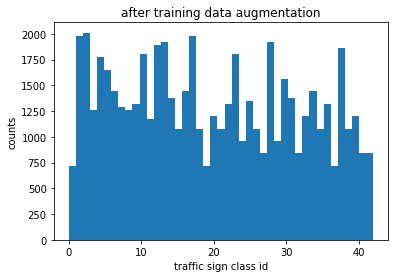

In [20]:
# Plot histogram of traffic sign type distribution in training data after augmentation.
plt.title('after training data augmentation')
plt.xlabel('traffic sign class id')
plt.ylabel('counts')
plt.hist(y_train_aug, bins = 43)

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

#### Grayscale

In [ ]:
#%%time

# Define append function.
def add_gray(X_data, x):
    return X_data.append(x)

# Define image conversion to grayscale.
def grayscale(image):
    image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    return np.expand_dims(image_gray, axis = 2)

# Define data conversion to grayscale.
def conv_gray(X_data):
    X_data_gray = []
    
    for x in X_data:
        image_gray = grayscale(x)
        add_gray(X_data_gray, image_gray)
    return np.array(X_data_gray, np.uint8)
    
# Convert images to grayscale.
X_train_gray = conv_gray(X_train_aug)
X_valid_gray = conv_gray(X_valid)
X_test_gray = conv_gray(X_test)

y_train_gray = y_train_aug
y_valid_gray = y_valid
y_test_gray = y_test
print('Converted to grayscale. -> Done!')

# Print information.
if X_train_gray.shape[0] == y_train_gray.shape[0]:
    n_train_gray = X_train_gray.shape[0]
    print('Number of training features is equal to number of training labels after conversion to grayscale. -> Good!')
else:
    print("Number of training features is NOT equal to number of training labels after conversion to grayscale. -> Error!!!")
    
if X_valid_gray.shape[0] == y_valid_gray.shape[0]:
    n_valid_gray = X_valid_gray.shape[0]
    print('Number of validation features is equal to number of validation labels after conversion to grayscale. -> Good!')
else:
    print("Number of validation features is NOT equal to number of validation labels after conversion to grayscale. -> Error!!!")
    
if X_test_gray.shape[0] == y_test_gray.shape[0]:
    n_test_gray = X_test_gray.shape[0]
    print('Number of test features is equal to number of test labels after conversion to grayscale. -> Good!')
else:
    print("Number of test features is NOT equal to number of test labels after conversion to grayscale. -> Error!!!")

image_shape_gray = X_train_gray.shape[1:4]
n_classes_gray = len(set(y_train_gray))
print()
print("Number of training examples after conversion to grayscale =", n_train_gray)
print("Number of validation examples after conversion to grayscale =", n_valid_gray)
print("Number of test examples after conversion to grayscale =", n_test_gray)
print("Image data shape after conversion to grayscale =", image_shape_gray)
print("Number of classes after conversion to grayscale =", n_classes_gray)

#### Grayscale visualization

In [ ]:
# Plot randomly chosen traffic sign from augmented training data in grayscale together with its class id.
index_gray = random.randint(0, n_train_gray)
image_gray = X_train_gray[index_gray].squeeze()

plt.figure(figsize=(3,3))
plt.imshow(image_gray)
print(y_train_gray[index_gray])

#### Normalization

In [34]:
# Simple Normalization.
#X_train_norm = (X_train_gray - 128) / 128
#X_valid_norm = (X_valid_gray - 128) / 128

# Define Min-Max Normalization.
def normalize(image):
    a = -1
    b = 1
    x_min = 0
    x_max = 255
    return a + (((image - x_min) * (b - a)) / (x_max - x_min))

# Normalize images
X_train_norm = X_train
X_valid_norm = X_valid
X_test_norm = X_test

y_train_norm = y_train
y_valid_norm = y_valid
y_test_norm = y_test
print('All images normalized. -> Done!')

# Print information.
if X_train_norm.shape[0] == y_train_norm.shape[0]:
    n_train_norm = X_train_norm.shape[0]
    print('Number of training features is equal to number of training labels after normalization. -> Good!')
else:
    print("Number of training features is NOT equal to number of training labels after normalization. -> Error!!!")
    
if X_valid_norm.shape[0] == y_valid_norm.shape[0]:
    n_valid_norm = X_valid_norm.shape[0]
    print('Number of validation features is equal to number of validation labels after normalization. -> Good!')
else:
    print("Number of validation features is NOT equal to number of validation labels after normalization. -> Error!!!")
    
if X_test_norm.shape[0] == y_test_norm.shape[0]:
    n_test_norm = X_test_norm.shape[0]
    print('Number of test features is equal to number of test labels after normalization. -> Good!')
else:
    print("Number of test features is NOT equal to number of test labels after normalization. -> Error!!!")

image_shape_norm = X_train_norm.shape[1:4]
n_classes_norm = len(set(y_train_norm))
print()
print("Number of training examples after normalization =", n_train_norm)
print("Number of validation examples after normalization =", n_valid_norm)
print("Number of test examples after normalization =", n_test_norm)
print("Image data shape after normalization =", image_shape_norm)
print("Number of classes after normalization =", n_classes_norm)

All images normalized. -> Done!
Number of training features is equal to number of training labels after normalization. -> Good!
Number of validation features is equal to number of validation labels after normalization. -> Good!
Number of test features is equal to number of test labels after normalization. -> Good!

Number of training examples after normalization = 34799
Number of validation examples after normalization = 4410
Number of test examples after normalization = 12630
Image data shape after normalization = (32, 32, 3)
Number of classes after normalization = 43


#### Normalization visualization

32


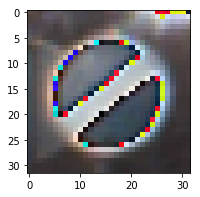

In [23]:
# Plot randomly chosen traffic sign from augmented training data after normalization together with its class id.
index_norm = random.randint(0, n_train_norm)
image_norm = X_train_norm[index_norm].squeeze()

plt.figure(figsize=(3,3))
plt.imshow(image_norm)
print(y_train_norm[index_norm])

### Model Architecture

In [35]:
# Define epochs and batch size.
EPOCHS = 10
BATCH_SIZE = 128

In [36]:
# LeNet architecture.
def LeNet(x):    
    # Hyperparameters.
    mu = 0
    sigma = 0.1

    # Layer 1: CNN. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma), name = 'conv1_W')
    conv1_b = tf.Variable(tf.zeros(6), name = 'conv1_b')
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation 1.
    act1 = tf.nn.relu(conv1)

    # Max pooling 1. Input = 28x28x6. Output = 14x14x6.
    max1 = tf.nn.max_pool(act1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Layer 2: 1x1 convolution. Input = 14x14x6. Output = 14x14x11.
    #conv1_1_W = tf.Variable(tf.truncated_normal(shape=(1, 1, 6, 11), mean = mu, stddev = sigma), name = 'conv1_1_W')
    #conv1_1_b = tf.Variable(tf.zeros(11), name = 'conv1_1_b')
    #conv1_1   = tf.nn.conv2d(max1, conv1_1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_1_b
    
    # Activation 2.
    #act2 = tf.nn.relu(max1)

    # Layer 3: CNN. Input = 14x14x6. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma), name = 'conv2_W')
    conv2_b = tf.Variable(tf.zeros(16), name = 'conv2_b')
    conv2   = tf.nn.conv2d(max1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # Activation 3.
    act3 = tf.nn.relu(conv2)

    # Max pooling 2. Input = 10x10x16. Output = 5x5x16.
    max2 = tf.nn.max_pool(act3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    f   = flatten(max2)

    # Layer 4: FCL. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma), name = 'fc1_W')
    fc1_b = tf.Variable(tf.zeros(120), name = 'fc1_b')
    fc1   = tf.matmul(f, fc1_W) + fc1_b

    # Activation 4.
    act4  = tf.nn.relu(fc1)
    
    # Dropout 1.
    #d1 = tf.nn.dropout(act4, dropout)

    # Layer 5: FCL. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma), name = 'fc2_W')
    fc2_b  = tf.Variable(tf.zeros(84), name = 'fc2_b')
    fc2    = tf.matmul(act4, fc2_W) + fc2_b

    # Activation 5.
    act5   = tf.nn.relu(fc2)
    
    # Dropout 2.
    #d2 = tf.nn.dropout(act5, dropout)
    
    # Layer 6: FCL. Input = 84. Output = 60.
    #fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 60), mean = mu, stddev = sigma), name = 'fc3_W')
    #fc3_b  = tf.Variable(tf.zeros(60), name = 'fc3_b')
    #fc3    = tf.matmul(d2, fc3_W) + fc3_b
    
    # Activation 6.
    #act6   = tf.nn.relu(fc3)

    # Layer 7: Output. Input = 84. Output = n_classes_norm.
    out_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes_norm), mean = mu, stddev = sigma), name = 'out_W')
    out_b  = tf.Variable(tf.zeros(n_classes_norm), name = 'out_b')
    logits = tf.matmul(act5, out_W) + out_b

    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

#### Features, labels and dropout
`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.
`keep_prob` is a placeholder for the probability in dropout to keep units.

In [37]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes_norm)

keep_prob = tf.placeholder(tf.float32)

#### Training pipeline

In [38]:
# Define learning rate for the optimizer
rate = 0.001

# Training pipeline
logits = LeNet(x)
#predictions = tf.nn.softmax(logits)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

#### Model evaluation

In [39]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

#### Train the model

In [40]:
# Train the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_norm)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_shuffle, y_train_shuffle = shuffle(X_train_norm, y_train_norm)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_shuffle[offset:end], y_train_shuffle[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid_norm, y_valid_norm)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
# Save the model    
    saver.save(sess, './tsc3')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.635

EPOCH 2 ...
Validation Accuracy = 0.769

EPOCH 3 ...
Validation Accuracy = 0.830

EPOCH 4 ...
Validation Accuracy = 0.830

EPOCH 5 ...
Validation Accuracy = 0.847

EPOCH 6 ...
Validation Accuracy = 0.849

EPOCH 7 ...
Validation Accuracy = 0.870

EPOCH 8 ...
Validation Accuracy = 0.867

EPOCH 9 ...
Validation Accuracy = 0.874

EPOCH 10 ...
Validation Accuracy = 0.871

Model saved


#### Test the model

In [41]:
# Test the model
#with tf.Session() as sess:
    #saver.restore(sess, './tsc1')
    #print("Model loaded")
    #test_accuracy = evaluate(X_test_norm, y_test)
    #print("Test Accuracy = {:.3f}".format(test_accuracy))

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

Load the images and plot them here.
Feel free to use as many code cells as needed.

In [42]:
# List images
#image_list = os.listdir("new-german-traffic-signs")
#print('Original image list: ',image_list)

# Resize images. Code from https://opensource.com/life/15/2/resize-images-python
#width = 32
#height = 32
#############################################
#os.mkdir('new-german-traffic-signs_resized')
#############################################
#for single_image in image_list:
    #print('Image name: ',single_image)
    #image = Image.open('new-german-traffic-signs/'+single_image)
    #print('Original image size: ',image.size)
    #ratio = (width / float(image.size[0]))
    #height = int((float(image.size[1]) * float(ratio)))
    #image = image.resize((width, height), PIL.Image.ANTIALIAS)
    #image.save('new-german-traffic-signs_resized/'+single_image)
    #print('Resized Image size: ',image.size)
    #plt.imshow(image)
    #plt.show()

# Load the images
#X_new = []
#for single_image in image_list:
    #image = mpimg.imread('new-german-traffic-signs_resized/'+single_image)
    #X_new.append(image)
    
#X_new = np.array(X_new)
#n_new = X_new.shape[0]
#image_shape_new = X_new.shape[1:4]
#print('Information about new traffic signs:')
#print("Number of new examples =", n_new)
#print("Image data shape =", image_shape_new)

# Output the images
#grid = gridspec.GridSpec(1, 5)
#print()
#print('5 new traffic signs:')
#for i in range(len(image_list)):
    #image = X_new[i].squeeze()
    #plt.subplot(grid[i]).imshow(image)

### Predict the Sign Type for Each Image

In [43]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

#### Normalization

In [44]:
# Min-Max Normalization
#def normalize(image_data):
    #a = -1.0
    #b = 1.0
    #x_min = 0
    #x_max = 255
    #return a + (((image_data - x_min) * (b - a)) / (x_max - x_min))

#X_new_norm = normalize(X_new)

#### Prediciton

In [45]:
# Variables and placeholders
#conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma), name = 'conv1_W')
#conv1_b = tf.Variable(tf.zeros(6), name = 'conv1_b')
#conv1_1_W = tf.Variable(tf.truncated_normal(shape=(1, 1, 6, 11), mean = mu, stddev = sigma), name = 'conv1_1_W')
#conv1_1_b = tf.Variable(tf.zeros(11), name = 'conv1_1_b')
#conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 11, 16), mean = mu, stddev = sigma), name = 'conv2_W')
#conv2_b = tf.Variable(tf.zeros(16), name = 'conv2_b')
#fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma), name = 'fc1_W')
#fc1_b = tf.Variable(tf.zeros(120), name = 'fc1_b')
#fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma), name = 'fc2_W')
#fc2_b  = tf.Variable(tf.zeros(84), name = 'fc2_b')
#fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 60), mean = mu, stddev = sigma), name = 'fc3_W')
#fc3_b  = tf.Variable(tf.zeros(60), name = 'fc3_b')
#out_W  = tf.Variable(tf.truncated_normal(shape=(60, n_classes), mean = mu, stddev = sigma), name = 'out_W')
#out_b  = tf.Variable(tf.zeros(n_classes), name = 'out_b')
#keep_prob = tf.placeholder(tf.float32)

# Prediction
#with tf.Session() as sess:
    #tf.train.Saver().restore(sess, './tsc1')
    #print("Model loaded")
    #result = sess.run(logits, feed_dict={x: X_new_norm[0], keep_prob: 1.0})

### Analyze Performance

In [46]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [47]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [48]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

#def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    #activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    #featuremaps = activation.shape[3]
    #plt.figure(plt_num, figsize=(15,15))
    #for featuremap in range(featuremaps):
        #plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        #plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        #if activation_min != -1 & activation_max != -1:
            #plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        #elif activation_max != -1:
            #plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        #elif activation_min !=-1:
            #plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        #else:
            #plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")